loading package and seurat object

In [1]:
library(Seurat)
library(liger)

Attaching SeuratObject

Le chargement a nécessité le package : cowplot

Le chargement a nécessité le package : Matrix

Le chargement a nécessité le package : patchwork


Attachement du package : ‘patchwork’


L'objet suivant est masqué depuis ‘package:cowplot’:

    align_plots




In [2]:
custom_colors <- list()

colors_dutch <- c("#16a085", "#2980b9", "#4834d4", "#f39c12", "#c0392b",
                  "#130f40", "#f78fb3", "#65d6ce", "#d1c145", "#2ecc71",
                  "#d35400", "#c44569", '#ff7f50', '#706fd3', '#f9ca24',
                  '#34ace0', '#33d9b2', '#2c2c54', '#be2edd')

colors_spanish <- c(
  '#40407a','#706fd3','#f7f1e3','#34ace0','#33d9b2',
  '#2c2c54','#474787','#aaa69d','#227093','#218c74',
  '#ff5252','#ff793f','#d1ccc0','#ffb142','#ffda79',
  '#b33939','#cd6133','#84817a','#cc8e35','#ccae62'
)

custom_colors$discrete <- c(colors_dutch, colors_spanish)

custom_colors$cell_cycle <- setNames(
  c('#45aaf2', '#f1c40f', '#e74c3c', '#7f8c8d'),
  c('G1',      'S',       'G2M',     '-')
)

In [3]:
options(repr.plot.width = 18, repr.plot.height = 17, repr.plot.pointsize = 24)

In [4]:
microglia <- readRDS("/home/adufour/work/rds_storage/microglia/microglia.rds")

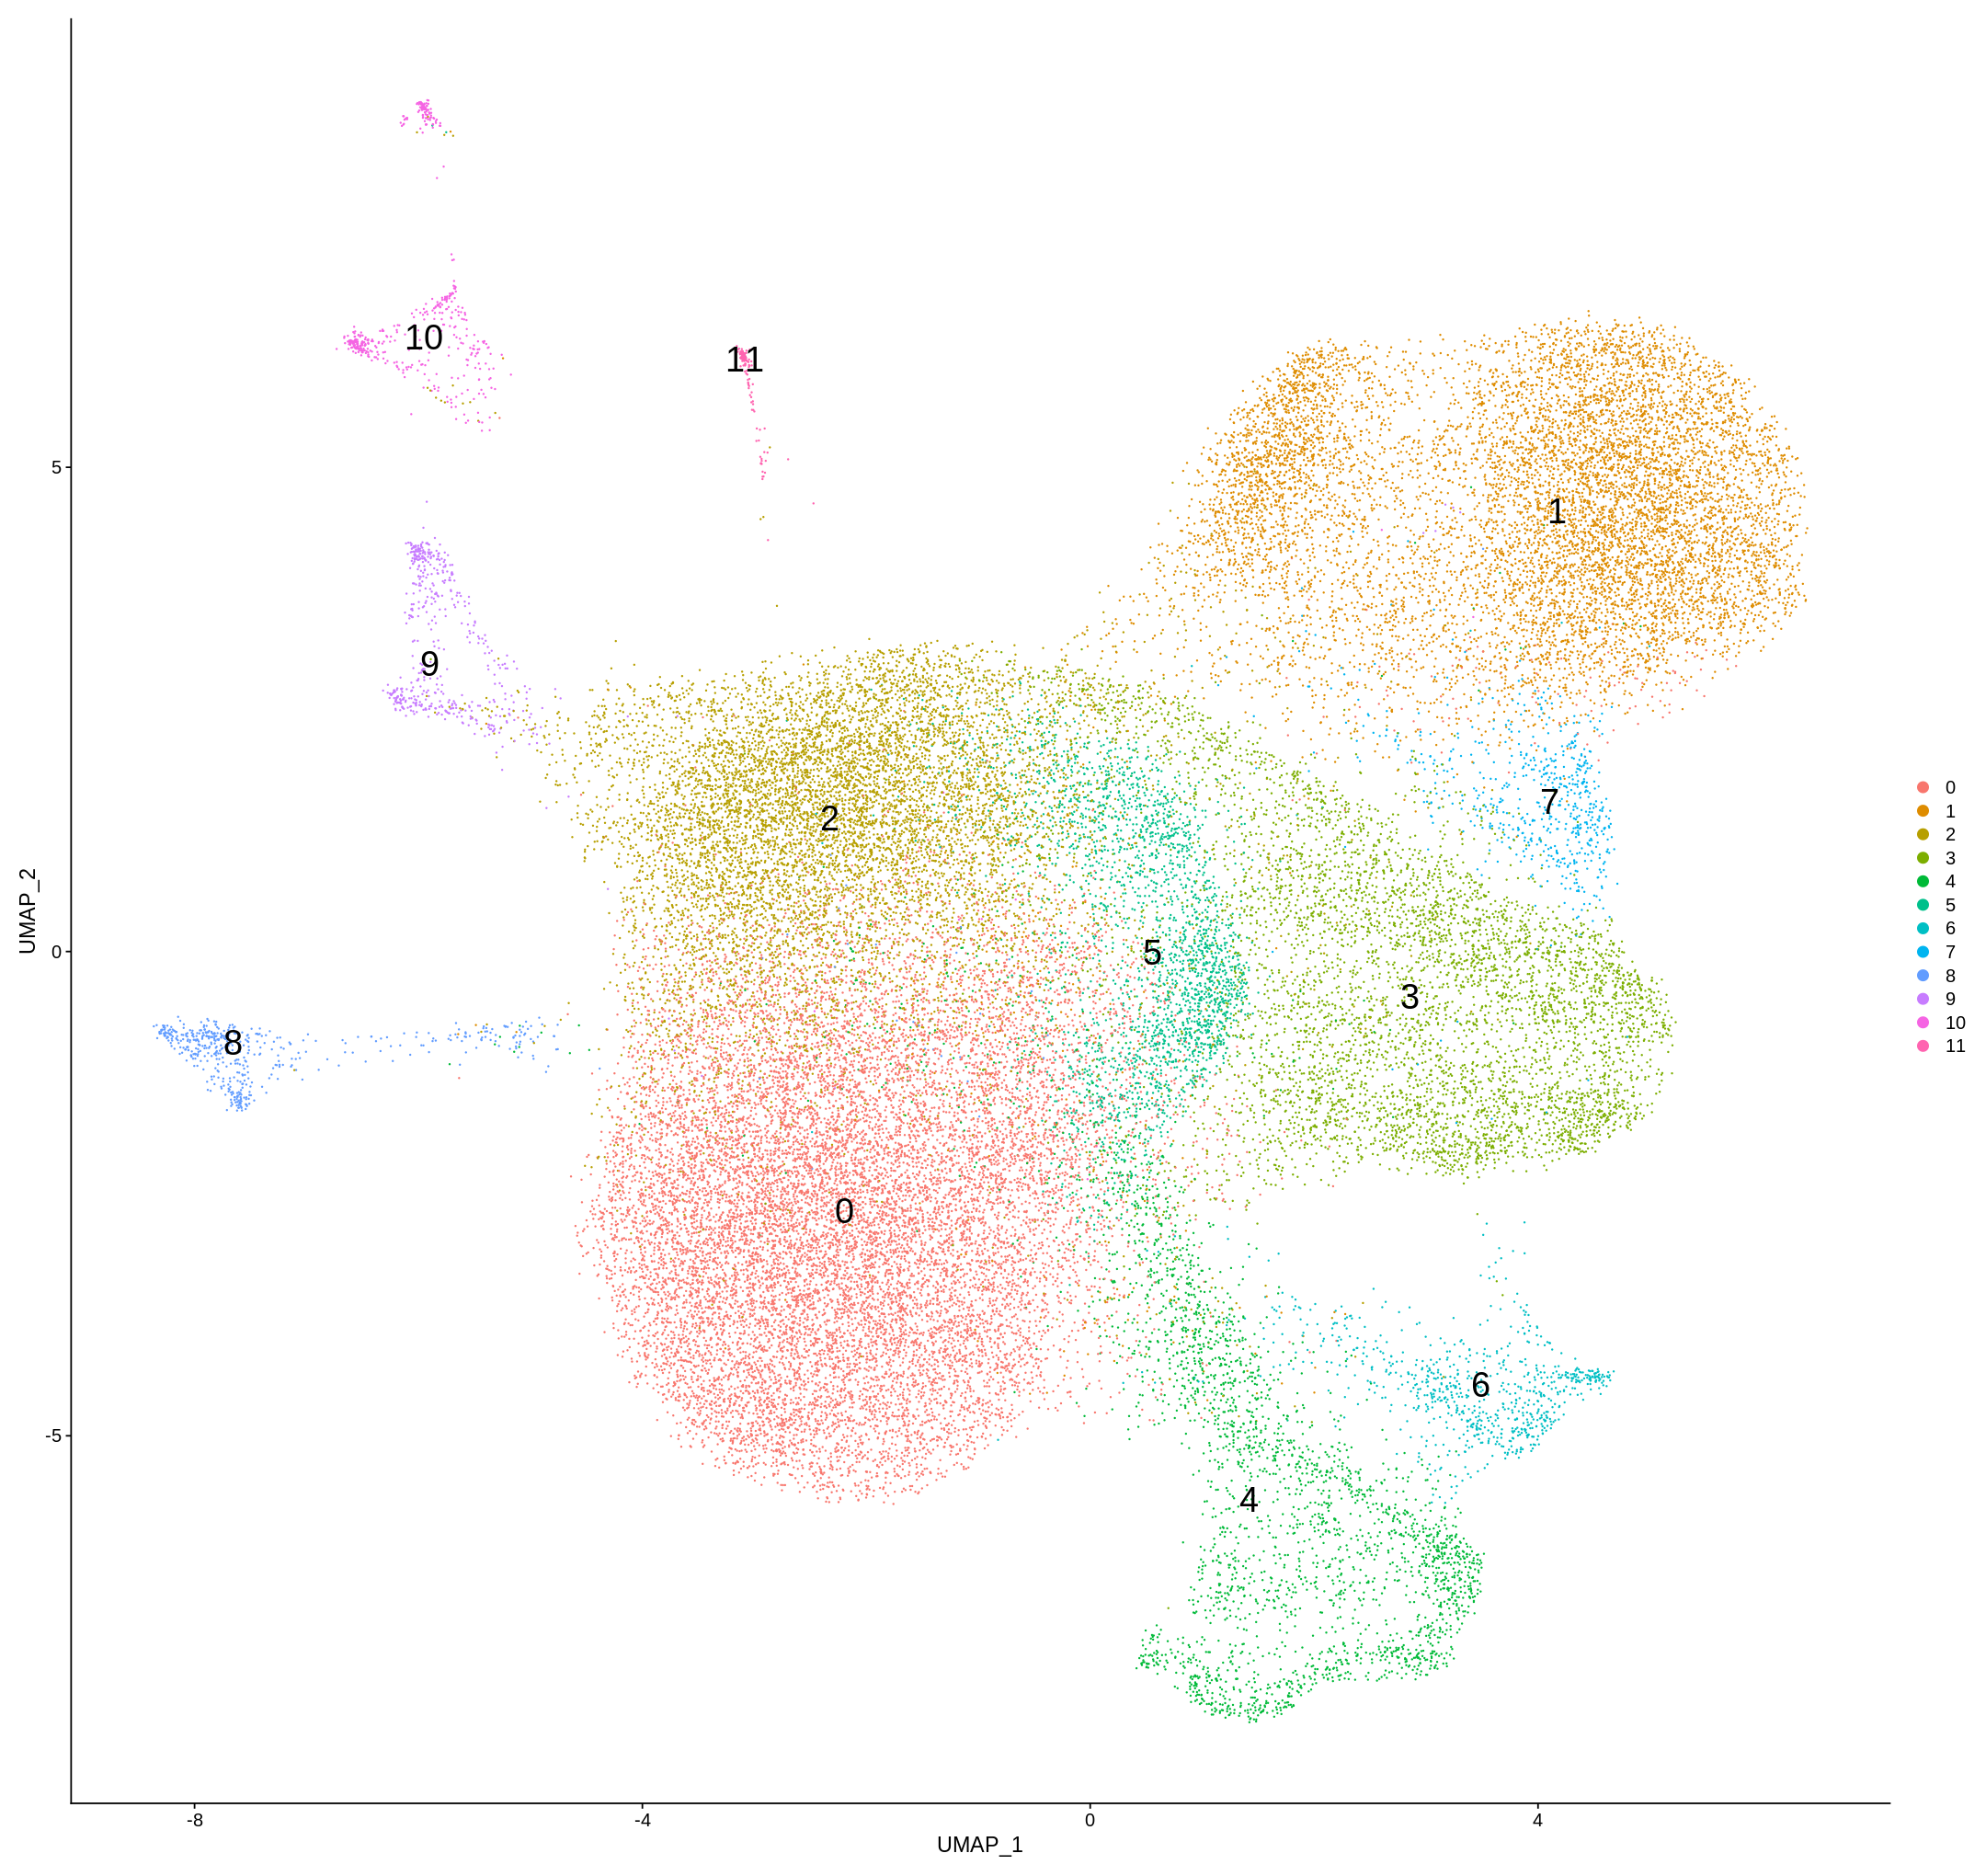

In [6]:
DimPlot(microglia, reduction = "umap", label = TRUE, label.size = 8)

In [7]:
microglia_subset <- subset(microglia, idents = 0)

In [8]:
microglia_subset <- FindVariableFeatures(microglia_subset)
microglia_subset <- ScaleData(microglia_subset, split.by = "SAMP", do.center = FALSE)
options(warn = -1)
microglia_subset <- RunOptimizeALS(microglia_subset, k = 20, lambda = 5, split.by = "SAMP")
microglia_subset <- RunQuantileNorm(microglia_subset, split.by = "SAMP")
options(warn = 0)

Scaling data matrix

Scaling data from split P1-IL1a

Scaling data from split P1-IL1b

Scaling data from split P1-PBSa

Scaling data from split P1-PBSb

Scaling data from split P3-IL1a

Scaling data from split P3-IL1b

Scaling data from split P3-PBSa

Scaling data from split P3-PBSb

Scaling data from split P5-IL1a

Scaling data from split P5-IL1b

Scaling data from split P5-IL1c

Scaling data from split P5-IL1d

Scaling data from split P5-IL1e

Scaling data from split P5-IL1f

Scaling data from split P5-PBSa

Scaling data from split P5-PBSb

Scaling data from split P5-PBSc

Scaling data from split P5-PBSd

Scaling data from split P5-PBSe

Scaling data from split P5-PBSf



ERROR: Error in RunOptimizeALS(microglia_subset, k = 20, lambda = 5, split.by = "SAMP"): impossible de trouver la fonction "RunOptimizeALS"


In [9]:
microglia_subset <- RunPCA(microglia_subset, npcs = 50, verbose = FALSE)
microglia_subset <- RunUMAP(microglia_subset, reduction = "pca", dims = 1:7)
microglia_subset <- FindNeighbors(microglia_subset, reduction = "pca", dims = 1:7)
microglia_subset <- FindClusters(microglia_subset, resolution = 0.26, algorithm = 1)

17:03:22 UMAP embedding parameters a = 0.9922 b = 1.112

17:03:22 Read 14712 rows and found 7 numeric columns

17:03:22 Using Annoy for neighbor search, n_neighbors = 30

17:03:22 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

17:03:25 Writing NN index file to temp file /tmp/RtmpYkEJcD/file6ac41a4537bd

17:03:25 Searching Annoy index using 1 thread, search_k = 3000

17:03:32 Annoy recall = 100%

17:03:33 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

17:03:35 Initializing from normalized Laplacian + noise (using irlba)

17:03:35 Commencing optimization for 200 epochs, with 557208 positive edges

17:03:53 Optimization finished

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 14712
Number of edges: 388725

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8141
Number of communities: 3
Elapsed time: 5 seconds


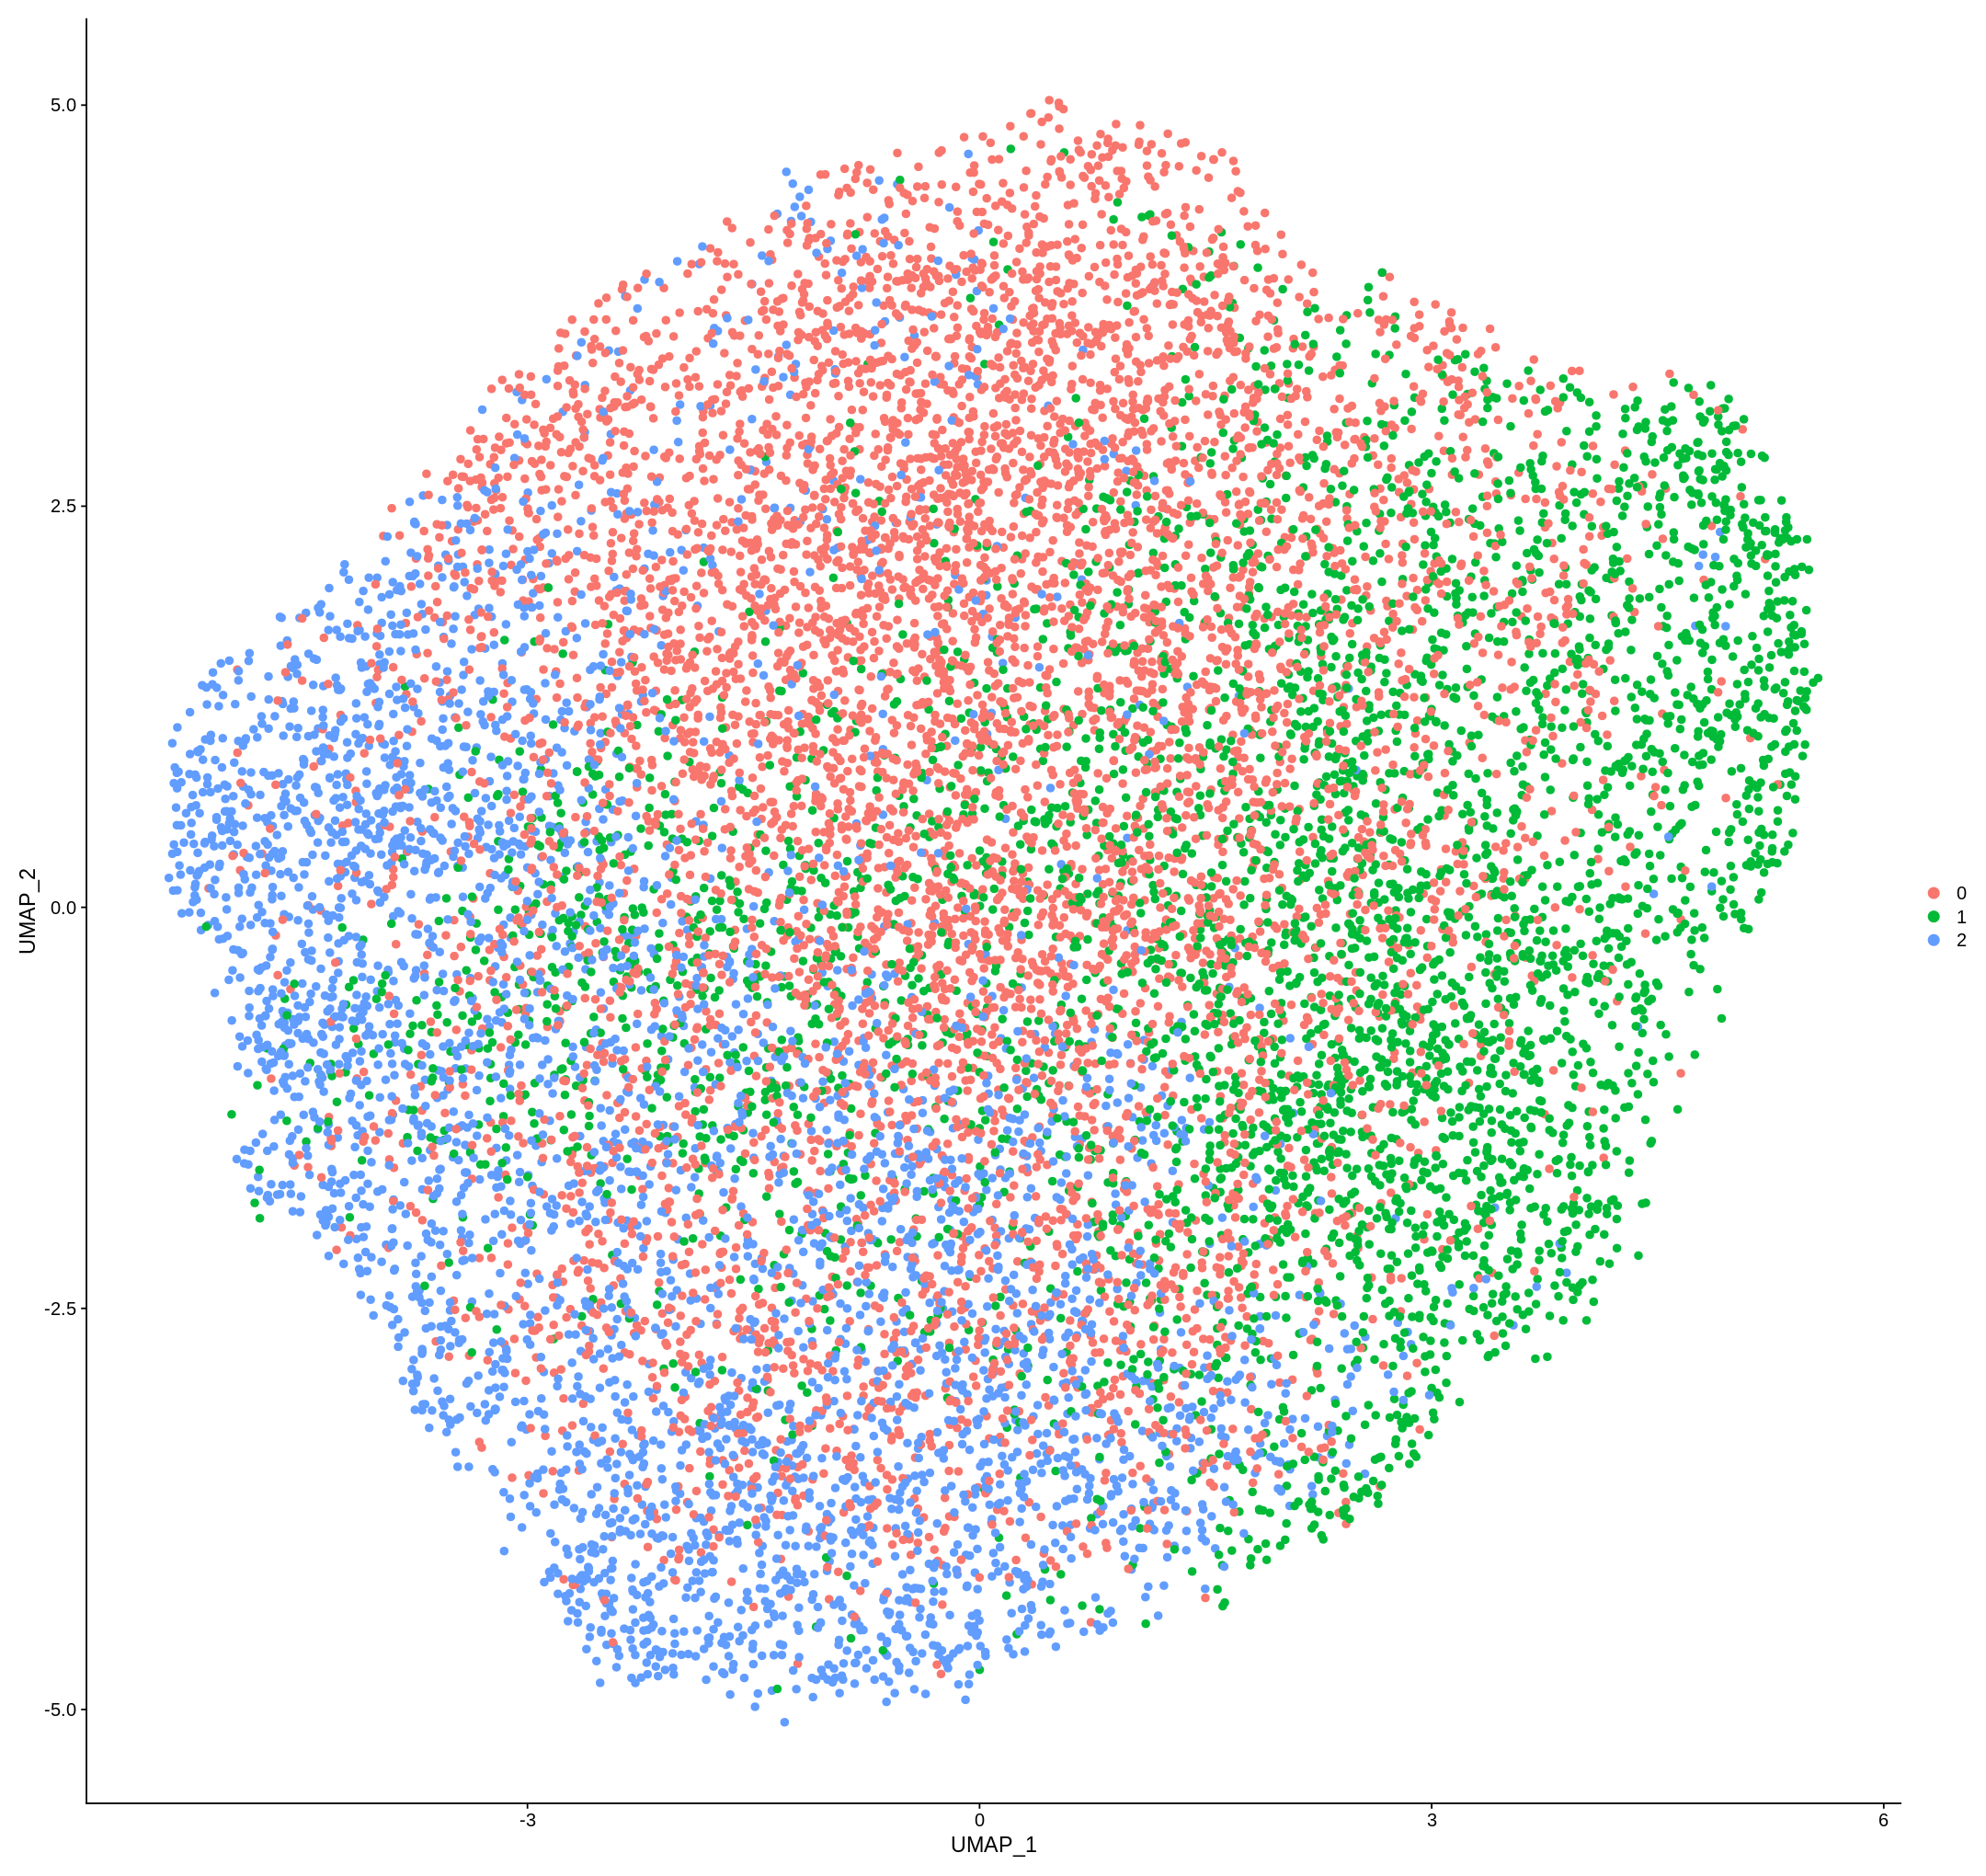

In [10]:
DimPlot(microglia_subset, pt.size = 2, reduction = "umap")

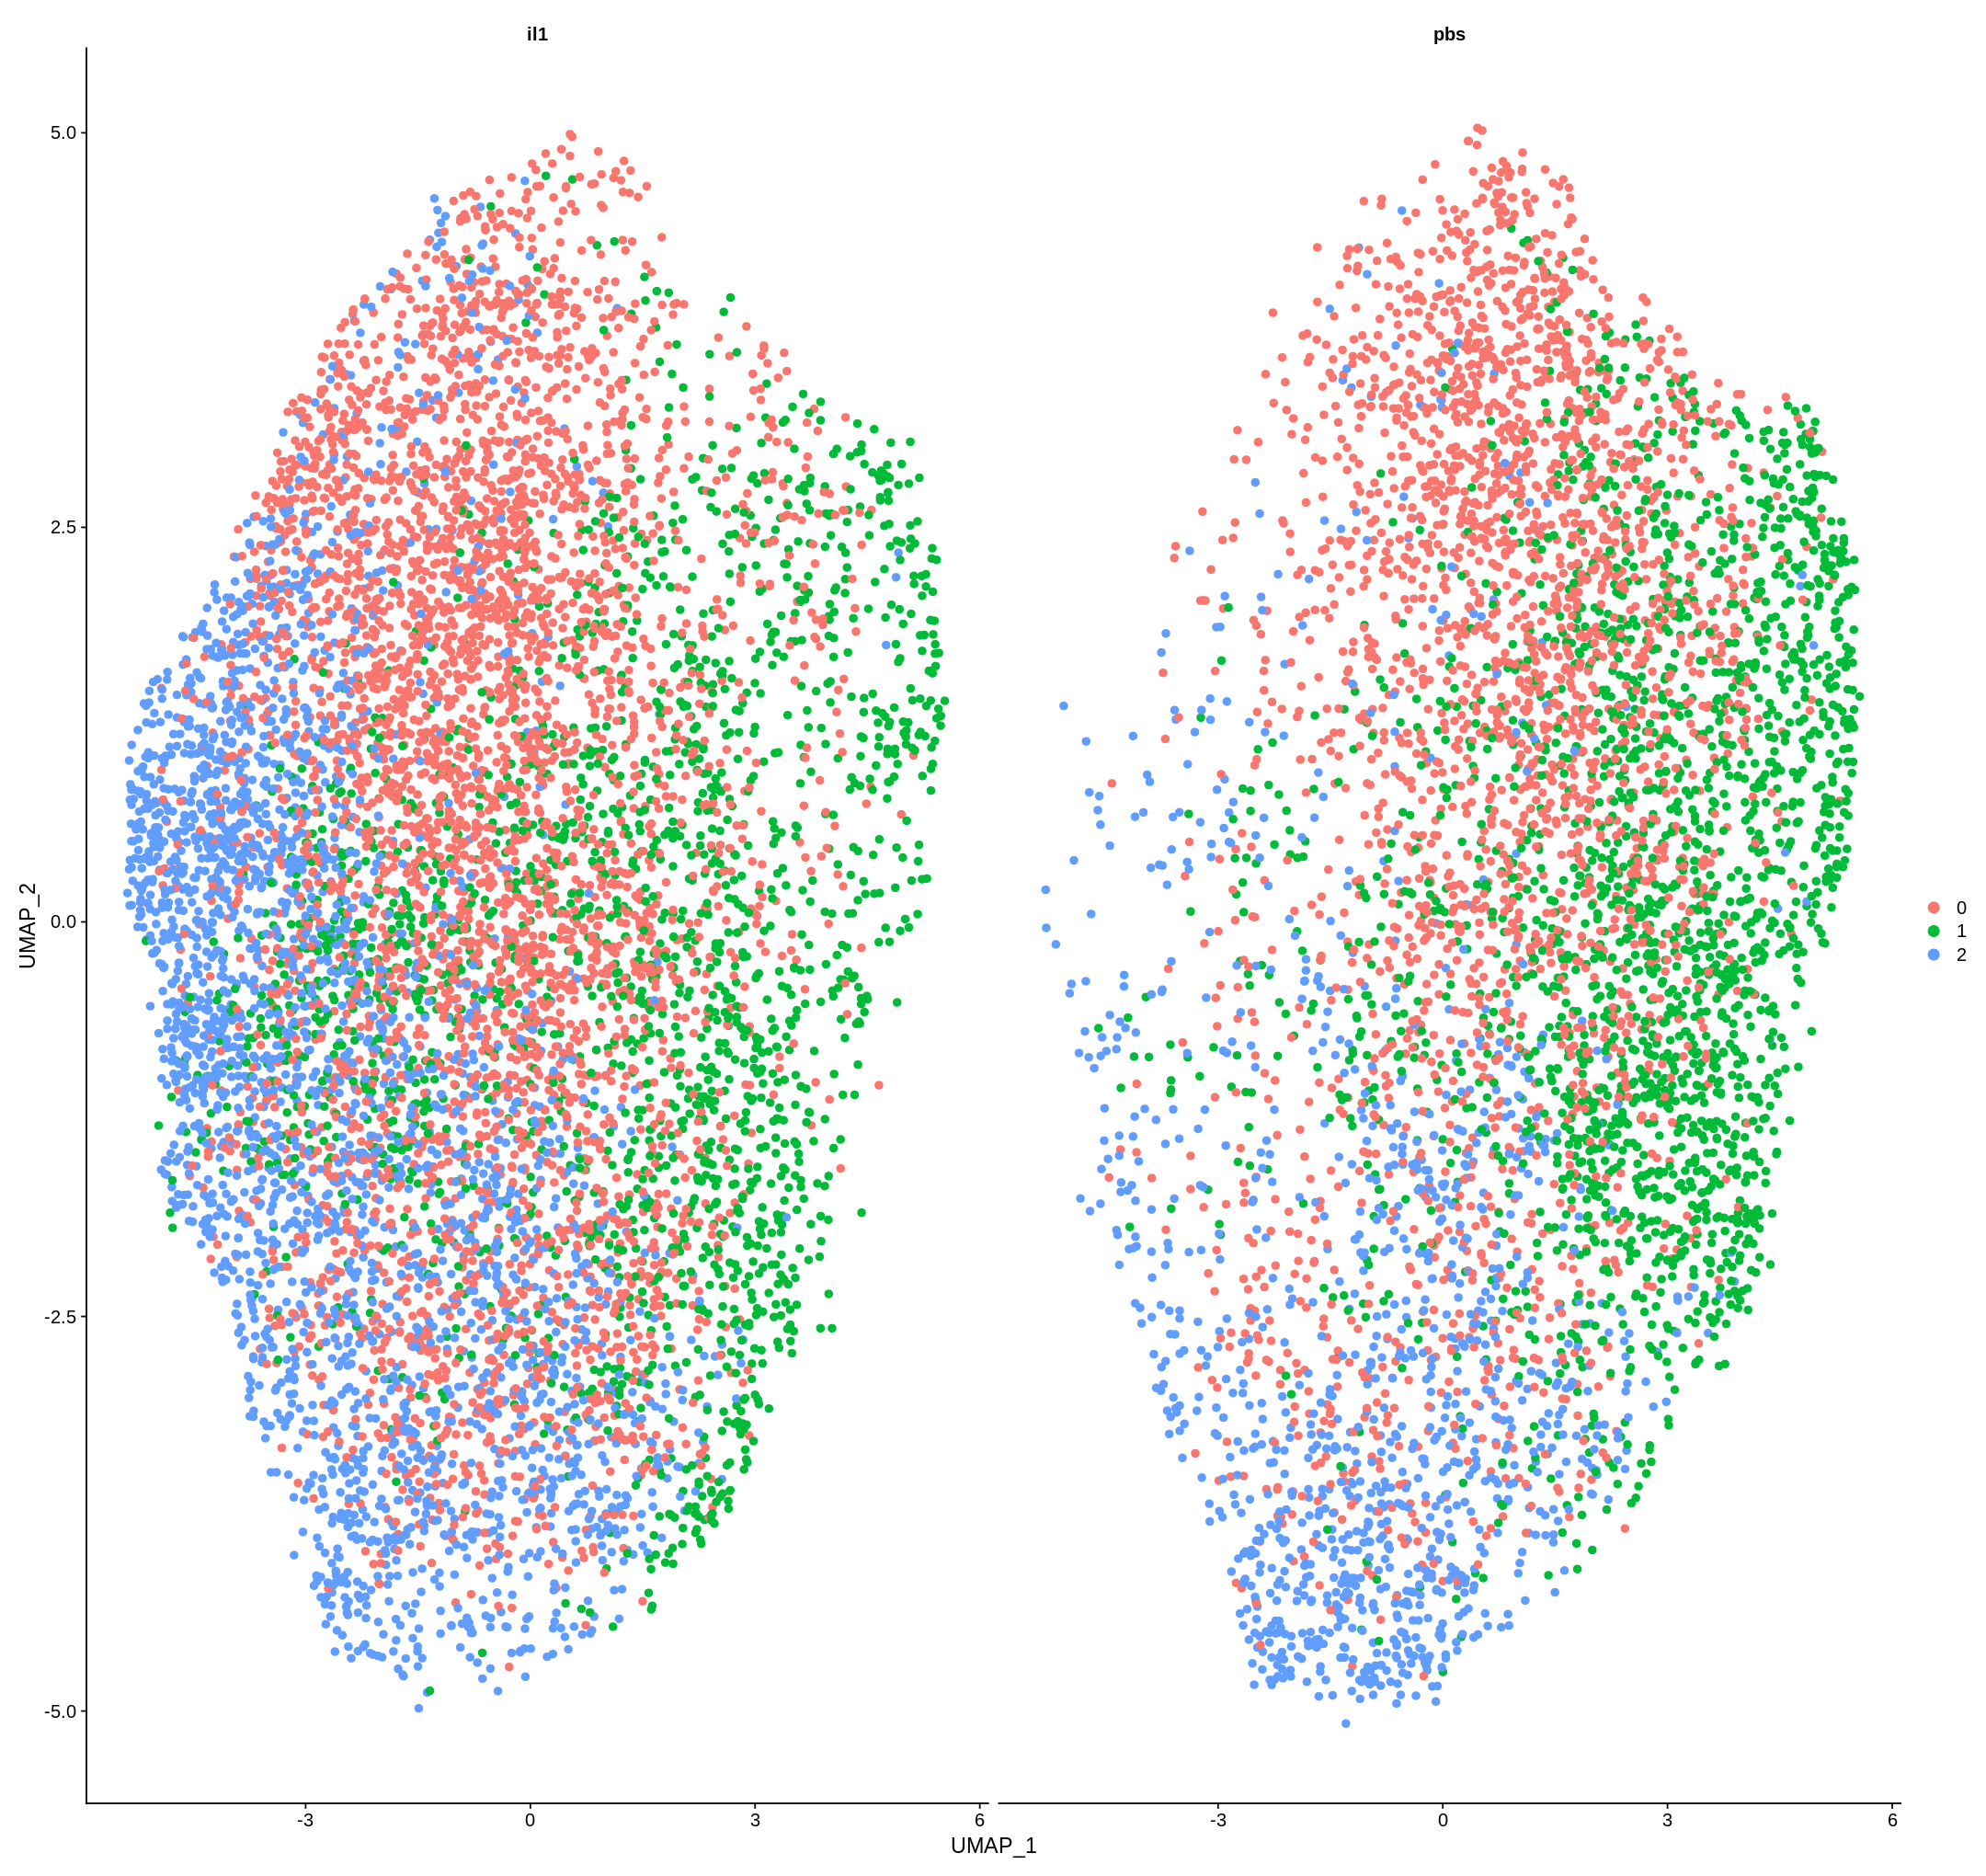

In [11]:
DimPlot(microglia_subset, pt.size = 2, reduction = "umap", split.by = "STIM")

In [12]:
saveRDS(microglia_subset, file = "/home/adufour/work/rds_storage/microglia/microglia_subcluster_C0.rds")